# Notebook that explore the LMC orbital histories

In [1]:
%pylab inline
import matplotlib as mpl
from pygadgetreader import *
from mpl_toolkits.mplot3d import Axes3D

font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


## To-Do:

1. Interpolate orbit to find the best observable value!

|`Simulation`| `ICs` | Time (Gyrs) | Coordinates (kpc $\&$ km/s)|
|--------|---------|---------|--------|
| LMC3 | r=(24.33628 277.752518 58.543234), v=(4.336299 -58.767378 -77.49269) | 1.88  | r=(-0.21$\hat{x}$, -41.45$\hat{y}$, -28.11$\hat{z}$), v=(-72.23, -263.41, 218.57) |
| LMC4 (need to be improved) | r=(25, 308, 88.6), v=(6, -37, -68.6) | 1.42 | r = (-1.23$\hat{x}$, -43.04$\hat{y}$, -26.82$\hat{z}$), v=(-58$\hat{x}$, -225.28$\hat{y}$, 226.16)$\hat{z}$ | 
| LMC5 |  r=(8.314183 211.882583 122.726527), v=(14.090038 35.727729 -71.808439)  | 2.32 | r = (-0.79$\hat{x}$, -43.96$\hat{y}$, -28.28$\hat{z}$), v=(-62.34$\hat{x}$, -239.11$\hat{y}$, 225.07)$\hat{z}$  | 
| LMC6 | r=(11.584929 247.791118 129.901859),v=(11.910111 11.210542 -77.135969) | 2.38 | r = (-1.18$\hat{x}$, -44.96$\hat{y}$, -27.3$\hat{z}$), v=(-66.8$\hat{x}$, -245.39$\hat{y}$, 229.84)$\hat{z}$ | 


In [2]:
#Nbody1 = loadtxt('LMCMW-H6.txt')
# Function that reads the data from the Analytic integration
def reading_data(snap_name):
    host = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_host.txt')
    sat = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_sat.txt')
    t = host[:,0] 
    # Defining galactocentric distances and velocities
    x = sat[:,1] - host[:,1] 
    y = sat[:,2] - host[:,2] 
    z = sat[:,3] - host[:,3] 

    vx = sat[:,4] - host[:,4] 
    vy = sat[:,5] - host[:,5] 
    vz = sat[:,6] - host[:,6]        

    Rgal = np.sqrt(x**2.0 + y**2.0 + z**2.0)
    Vgal = np.sqrt(vx**2.0 + vy**2.0 + vz**2.0)
    
    return t, x, y, z, vx, vy, vz, Rgal, Vgal

def ICs(Rgal, cut, x, y, z, vx, vy, vz, t):
    Rcut = np.where(Rgal>=cut)[0]
    return Rgal[Rcut[0]], x[Rcut[0]], y[Rcut[0]], z[Rcut[0]], vx[Rcut[0]], vy[Rcut[0]], vz[Rcut[0]], t[Rcut[0]]
    
def data_host(snap_name):
    host = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_host.txt')
    return host[:,1], host[:,2], host[:,3], host[:,4], host[:,5], host[:,6]

def data_sat(snap_name):
    sat = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_sat.txt')
    return sat[:,1], sat[:,2], sat[:,3], sat[:,4], sat[:,5], sat[:,6]

#Function that reads the N-body simulation orbit
def reading_Nbody(snap_name):
    data = np.loadtxt('orbits/' + snap_name)
    #time = data[:,0]
    #Rgal = data[:,1]
    x_sat= data[:,6]
    y_sat = data[:,7]
    z_sat = data[:,8]
    x_gal = data[:,0]
    y_gal = data[:,1]
    z_gal = data[:,2]
    #Vgal = data[:,8]
    vx_sat = data[:,9]
    vy_sat = data[:,10]
    vz_sat = data[:,11]
    vx_gal = data[:,3]
    vy_gal = data[:,4]
    vz_gal = data[:,5]
    Rgal= np.sqrt((x_sat-x_gal)**2 + (y_sat-y_gal)**2 + (z_sat-z_gal)**2)
    Vgal= np.sqrt((vx_sat-vx_gal)**2 + (vy_sat-vy_gal)**2 + (vz_sat-vz_gal)**2)

    return Rgal, x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal

    
def best_values(x, y, z, vx, vy, vz):
    """
    Computes the closes value of the N-body orbit to the observed present day LMC positions
    and velocities.
    
    """
    x_obs = -1
    y_obs = -41
    z_obs = -28
    vx_obs = -57
    vy_obs = -226
    vz_obs = 221
    Robs = np.sqrt((x_obs-x)**2.0 + (y_obs-y)**2.0 + (z_obs-z)**2.0)
    index = np.where(Robs == min(Robs))[0]
    
    sigma_vx = 13
    sigma_vy = 15
    sigma_vz = 19
    
    dx = x_obs - x[index]
    dy = y_obs - y[index]
    dz = z_obs - z[index]
    
    dvx = vx_obs - vx[index]
    dvy = vy_obs - vy[index]
    dvz = vz_obs - vz[index]
    t = np.linspace(0, 3, 151)

    print('Dr = ', dx, dy, dz)
    print('Dv = ', dvx, dvy, dvz)
    
    return t[index], x[index], y[index], z[index], vx[index], vy[index], vz[index]
    

## LMC6

In [4]:
R_gal6,  x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal = reading_Nbody('LMC6_40Mb0_orbit.txt')
best_values(x_sat-x_gal, y_sat-y_gal, z_sat-z_gal, vx_sat-vx_gal, vy_sat-vy_gal, vz_sat-vz_gal)

Dr =  [-0.470554] [ 2.457576] [-1.42977]
Dv =  [ 19.03294] [ 20.310012] [-15.77689]


(array([ 2.3]),
 array([-0.529446]),
 array([-43.457576]),
 array([-26.57023]),
 array([-76.03294]),
 array([-246.310012]),
 array([ 236.77689]))

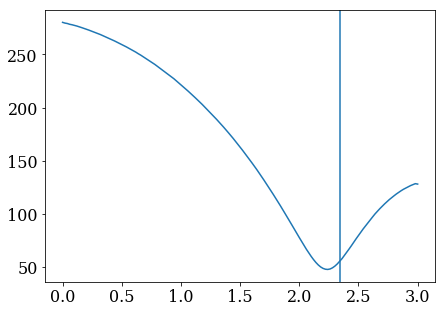

In [5]:
figure(figsize=(7,5))
plot(linspace(0, 3, 151), R_gal6)
axvline(2.34)

## LMC5

In [6]:
R_gal5, x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal = reading_Nbody('LMC5_40Mb0_orbit.txt')
best_values(x_sat-x_gal, y_sat-y_gal, z_sat-z_gal, vx_sat-vx_gal, vy_sat-vy_gal, vz_sat-vz_gal)

Dr =  [-1.305432] [-0.93092] [ 1.911477]
Dv =  [ 16.343265] [ 21.0018] [-2.988734]


(array([ 2.24]),
 array([ 0.305432]),
 array([-40.06908]),
 array([-29.911477]),
 array([-73.343265]),
 array([-247.0018]),
 array([ 223.988734]))

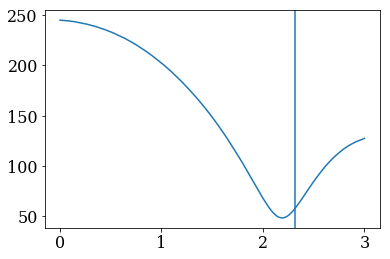

In [7]:
plot(np.linspace(0, 3, 151), R_gal5)
#plot(t5_2, R_gal5_2)

axvline(2.32)

## LMC4

In [15]:
R_gal4, x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal,\
vy_gal, vz_gal = reading_Nbody('LMC4/LMC4_1Mb0_orbit_2_092.txt')
best_values(x_sat-x_gal, y_sat-y_gal, z_sat-z_gal, vx_sat-vx_gal, vy_sat-vy_gal, vz_sat-vz_gal)

Dr =  [-0.133848] [-1.579271] [-4.682491]
Dv =  [ 11.026272] [ 46.679513] [-25.738725]


(array([ 2.32]),
 array([-0.866152]),
 array([-39.420729]),
 array([-23.317509]),
 array([-68.026272]),
 array([-272.679513]),
 array([ 246.738725]))

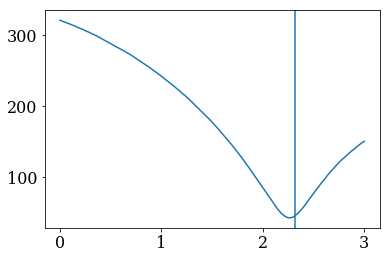

In [9]:
plot(np.linspace(0, 3, 151), RgalNB_2092)
axvline(2.32)


|Simulation| ICs | 
|--------|---------|
| LMC3_H10 |  | 
| LMC4_H0 | r=(20.392142 266.90138 82.252445), v=(7.370204 -32.65387 7.370204) | 
| LMC4_H1 | r=(15.938147 184.318269 43.330524), v=(10.949636 -22.197442 -99.102962) | 
| LMC4_H2 | r=(15.255384 191.783586 54.76852), v=(11.616064 -11.796171 -94.946403) | 
| LMC4_H3 | r=(14.537944 198.811104 66.078902), v=(12.088886 -2.755792 -90.558497)  | 
| LMC4_H4 | r=(13.810617 205.552718 77.212577), v=(12.40013 5.042759 -86.069407) | 
| LMC5_H1 | r=(8.314183 211.882583 122.726527), v=(14.090038 35.727729 -71.808439)  | 
| LMC6_H1 | r=(11.584929 247.791118 129.901859), v=(11.910111 11.210542 -77.135969)  | 


## LMC3 

In [11]:
R_gal3,  x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal = reading_Nbody('LMC3_40Mb0_orbit.txt')
best_values(x_sat-x_gal, y_sat-y_gal, z_sat-z_gal, vx_sat-vx_gal, vy_sat-vy_gal, vz_sat-vz_gal)

Dr =  [-1.810667] [ 0.021541] [ 1.743997]
Dv =  [ 15.725371] [ 46.326207] [ 3.65861]


(array([ 1.86]),
 array([ 0.810667]),
 array([-41.021541]),
 array([-29.743997]),
 array([-72.725371]),
 array([-272.326207]),
 array([ 217.34139]))

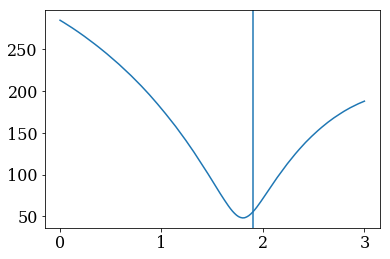

In [13]:
plot(np.linspace(0, 3, 151), R_gal3)
#plot(t3_2, R_gal3_2)

axvline(1.9)

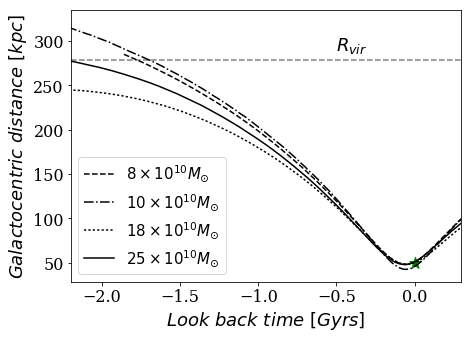

In [90]:
figure(figsize=(7,5))


plot(np.linspace(0, 3, 151)-1.86, R_gal3, label=r'$8 \times 10^{10} M_{\odot}$', ls='--', c='k')
plot(np.linspace(0, 3, 151)-2.32, R_gal4, label=r'$10 \times 10^{10} M_{\odot}$', ls='-.', c='k')
plot(np.linspace(0, 3, 151)-2.24, R_gal5, label=r'$18 \times 10^{10} M_{\odot}$', ls=':', c='k')
plot(np.linspace(0, 3, 151)-2.3, R_gal6, label=r'$25 \times 10^{10} M_{\odot}$', c='k')

xlim(-2.2, 0.3)
axhline(278, ls='--', c='k', alpha=0.5)
text(-0.5, 290, '$R_{vir}$', fontsize=18)

plt.scatter(0, 49.65, s=150, marker='*', c='green')
legend(fontsize=15)

xlabel('$Look\ back\ time\ [Gyrs]$', fontsize=18)
ylabel('$Galactocentric\ distance\ [kpc]$', fontsize=18)

savefig('../../../MW_anisotropy/figures/LMC_orbits.pdf', bbox_inches='tight')
savefig('../../../MW_anisotropy/figures/LMC_orbits.png', bbox_inches='tight')